In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img):
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img, cmap="gray")
    plt.show()


二维图像


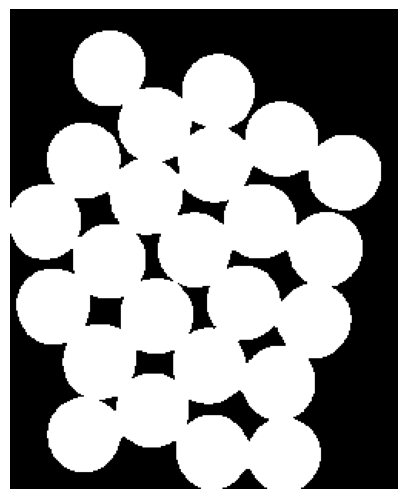

使用腐蚀，迭代10次


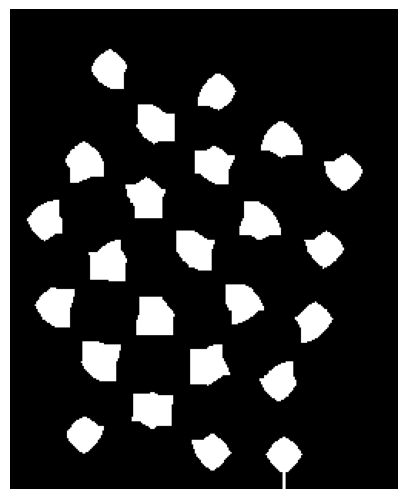

使用腐蚀，迭代11次


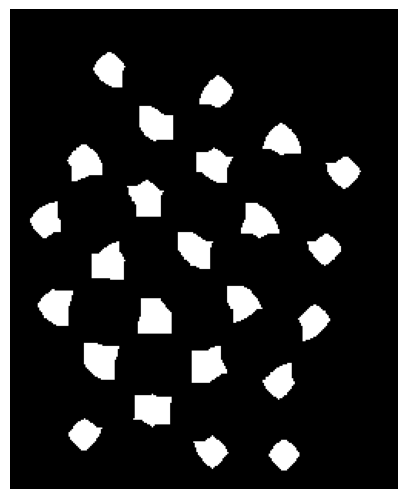

使用腐蚀，迭代12次


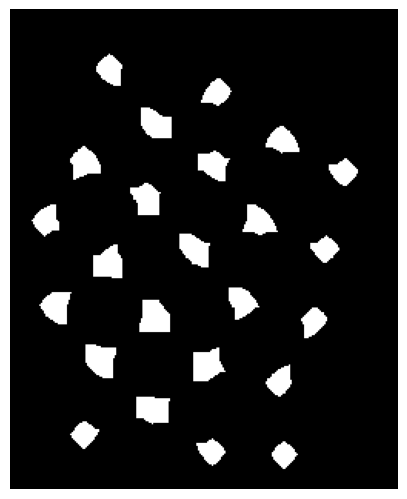

使用 DistanceTransform，阈值 0.5Max


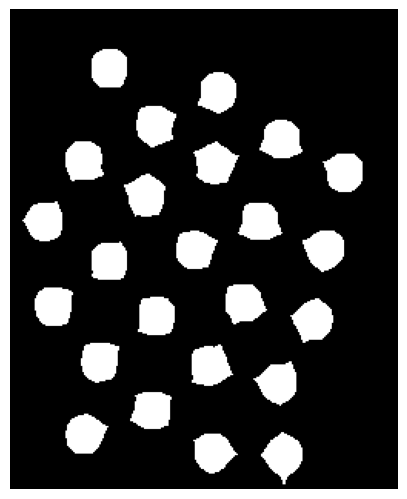

使用 DistanceTransform，阈值 0.6Max


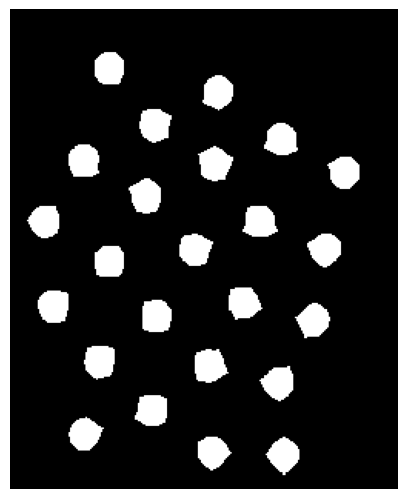

In [10]:
'''
对比膨胀腐蚀 和 distanceTransform 提取确定前景的效果
distanceTransform 更健壮
'''
src = cv2.imread('./image/coins.jpg', -1)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 阈值 + 形态学处理去除噪声
ret, bin_img = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=2)

print('二维图像')
show_image(bin_img)

print('使用腐蚀，迭代10次')
sure_fg = cv2.erode(bin_img, kernel, iterations=10)
show_image(sure_fg)

print('使用腐蚀，迭代11次')
sure_fg = cv2.erode(bin_img, kernel, iterations=11)
show_image(sure_fg)

print('使用腐蚀，迭代12次')
sure_fg = cv2.erode(bin_img, kernel, iterations=12)
show_image(sure_fg)

print('使用 DistanceTransform，阈值 0.5Max')
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 3)
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)  
show_image(sure_fg)

print('使用 DistanceTransform，阈值 0.6Max')
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 3)
ret, sure_fg = cv2.threshold(dist, 0.6 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)  
show_image(sure_fg)

 
# # unknown area
# unknown = cv2.subtract(sure_bg, sure_fg)
# imshow(unknown, axes[1,1])
# axes[1, 1].set_title('Unknown')
 
# plt.show()